# Car Price Prediction using Multiple Linear Regression

In [6]:
# Load library
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset 
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Check Missing value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# Label Encoding for Categorical variable in dataset
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
df['CarName']       = encoder.fit_transform(df['CarName'])
df['fueltype']      = encoder.fit_transform(df['fueltype'])
df['aspiration']    = encoder.fit_transform(df['aspiration']) 
df['doornumber']    = encoder.fit_transform(df['doornumber'])
df['carbody']       = encoder.fit_transform(df['carbody'])
df['drivewheel']    = encoder.fit_transform(df['drivewheel'])
df['enginelocation']= encoder.fit_transform(df['enginelocation'])
df['enginetype']    = encoder.fit_transform(df['enginetype'])
df['cylindernumber']= encoder.fit_transform(df['cylindernumber'])
df['fuelsystem']    = encoder.fit_transform(df['fuelsystem'])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [27]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:>

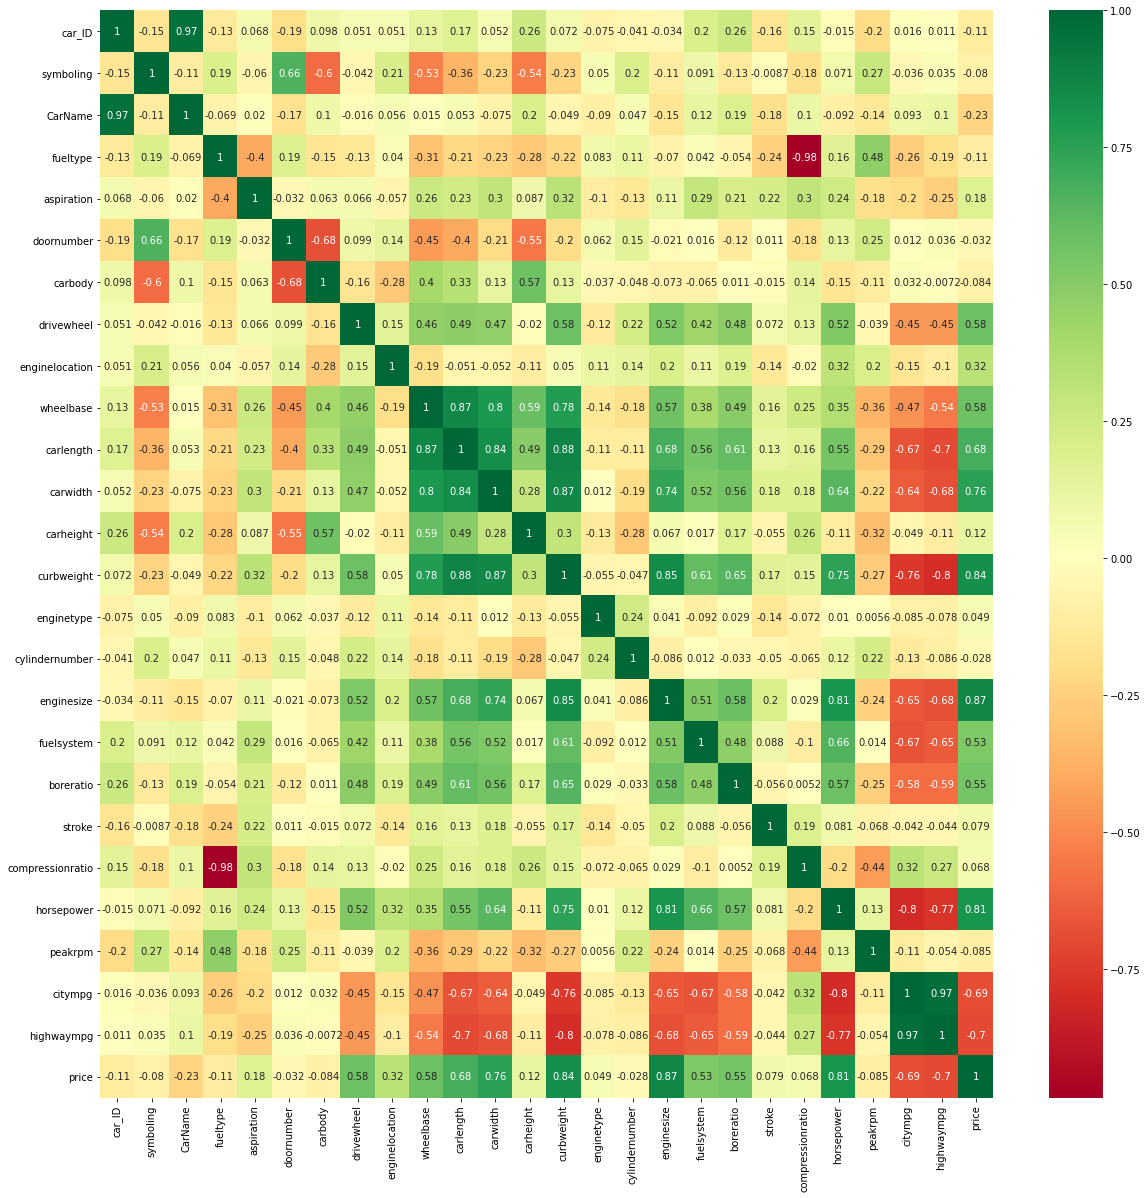

In [33]:
# Correlation with dataset
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn')

In [35]:
# Select Independent and Dependent or Target Variable in dataset
x = df.iloc[:,:-1]
y = df.iloc[:,25]

In [73]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)
print("shape of x_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of x_test  = ", x_test.shape)
print("shape of y_test  = ", y_test.shape)

shape of x_train =  (164, 25)
shape of y_train =  (164,)
shape of x_test  =  (41, 25)
shape of y_test  =  (41,)


In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test  = sc_x.fit_transform(x_test)

In [41]:
# Choose Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [74]:
# Predict value given model
y_pred = regressor.predict(x_test)
print(y_pred)
print(y_pred.shape)

[ 8821087.86277051  8451977.01317585  7352998.59916232  8937253.82559179
 10122460.20325456  9947019.11930843  9874857.54815781  7457805.63691404
  9010257.38550072  8492932.2213512   7636037.86171652  7571303.70736829
  7522086.86605277  9386688.20915943  7605803.56794376  7679028.22627263
  7564600.47333412 10702670.56601664  7624446.88364594  9424365.71009457
  8104644.04508242  7783852.3159367   8759756.56264072 12478282.98426407
  9456894.14869978 10449556.77762468  8757471.33264834 10489433.21732515
  9110688.14842017  7957589.9236543   8804087.86894293 10332279.44064846
  8815505.72356222  8582861.40416887 10345582.53328904  8506273.04942836
 10675419.83678604  8464966.51554219  9869482.83035146  8194132.46432097
  7513902.62617284]
(41,)


In [64]:
# Accuracy Score
print("Train Accuracy :", regressor.score(x_train,y_train))
print("Test  Accuracy :", regressor.score(x_test,y_test))

Train Accuracy : 0.9082610335448641
Test Accuracy : 0.8062705594085455
